In [20]:
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [21]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [22]:
train_data= torchvision.datasets.CIFAR10(root ='./data', train = True , transform=transform , download=True)
test_data= torchvision.datasets.CIFAR10(root ='./data', train = False , transform=transform , download=True)

Files already downloaded and verified
Files already downloaded and verified


In [23]:
train_loader = torch.utils.data.DataLoader(train_data,batch_size =32,shuffle = True , num_workers = 2)
test_loader = torch.utils.data.DataLoader(test_data,batch_size =32,shuffle = True , num_workers = 2)


In [24]:
image , label = train_data[0]

In [25]:
image.size()

torch.Size([3, 32, 32])

In [26]:
class_names = ['plane','car', 'bird', 'cat','deer' , 'dog' , 'frog','horse','ship','truck']

In [27]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 12,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(12 , 24 ,5)
        self.fc1 =nn.Linear(24*5*5 ,120)
        self.fc2 =nn.Linear(120 ,84)
        self.fc3 =nn.Linear(84 ,10)

    def forward(self , x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))          
        x = self.fc3(x)
        return x

In [28]:
net = NeuralNet()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = 0.001 , momentum =0.9)

In [29]:
for epoch in range(30):
    print(f'training epoch {epoch} ...')

    running_loss =0.0
    for i , data in enumerate(train_loader):
        inputs , labels = data 
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs , labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Loss : {running_loss/len(train_loader):.4f}')
        

training epoch 0 ...
Loss : 2.1584
training epoch 1 ...
Loss : 1.7360
training epoch 2 ...
Loss : 1.5602
training epoch 3 ...
Loss : 1.4402
training epoch 4 ...
Loss : 1.3385
training epoch 5 ...
Loss : 1.2462
training epoch 6 ...
Loss : 1.1708
training epoch 7 ...
Loss : 1.1016
training epoch 8 ...
Loss : 1.0449
training epoch 9 ...
Loss : 0.9930
training epoch 10 ...
Loss : 0.9500
training epoch 11 ...
Loss : 0.9095
training epoch 12 ...
Loss : 0.8758
training epoch 13 ...
Loss : 0.8410
training epoch 14 ...
Loss : 0.8103
training epoch 15 ...
Loss : 0.7759
training epoch 16 ...
Loss : 0.7475
training epoch 17 ...
Loss : 0.7200
training epoch 18 ...
Loss : 0.6955
training epoch 19 ...
Loss : 0.6662
training epoch 20 ...
Loss : 0.6450
training epoch 21 ...
Loss : 0.6202
training epoch 22 ...
Loss : 0.5969
training epoch 23 ...
Loss : 0.5768
training epoch 24 ...
Loss : 0.5548
training epoch 25 ...
Loss : 0.5333
training epoch 26 ...
Loss : 0.5130
training epoch 27 ...
Loss : 0.4899
tr

In [30]:
torch.save(net.state_dict(),'trained_net.pth')

In [31]:
net = NeuralNet()
net.load_state_dict(torch.load('trained_net.pth'))


C:\Users\oussa\AppData\Local\Temp\ipykernel_12920\1537608525.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('trained_net.pth'))


<All keys matched successfully>

In [32]:
correct = 0
total =0
net.eval()
with torch.no_grad():
    for data in test_loader :
        images,labels = data
        outputs = net(images)
        _,predicted = torch.max(outputs,1)
        total +=labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = 100*correct / total
print(f'Accuracy :{accuracy }%')

Accuracy :69.0%


In [33]:
new_transform=transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

def load_image(image_path):
    image=Image.open(image_path)
    image=new_transform(image)
    image=image.unsqueeze(0)
    return image

image_paths =['exemple7.WEBP','exemple5.WEBP','exemple8.WEBP']
images=[load_image(img) for img in image_paths]

net.eval()
with torch.no_grad():
    for image in images :
        output = net(image)
        _,predicted=torch.max(output,1)
        print(f'Prediction : {class_names[predicted.item()]}')
    

Prediction : bird
Prediction : horse
Prediction : ship


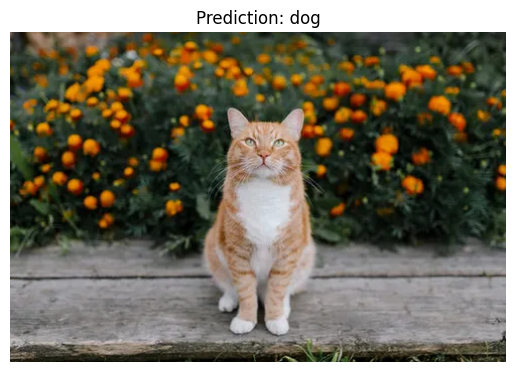

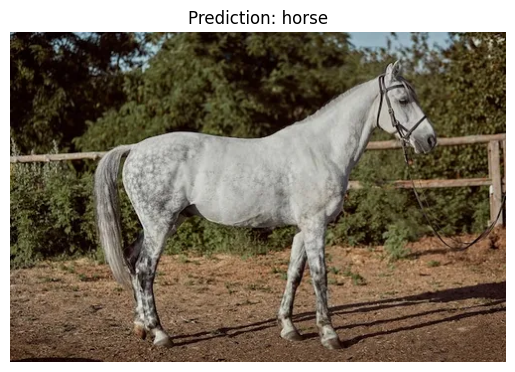

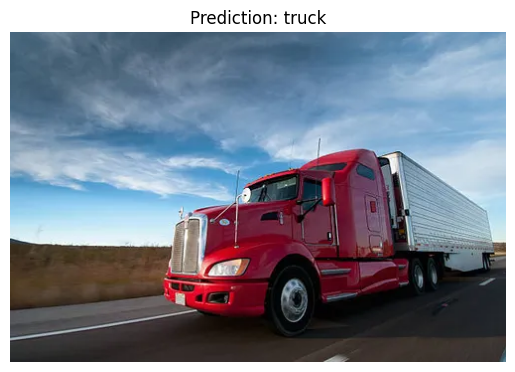

In [38]:
# Votre transformation pour l'image
new_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Fonction pour charger et transformer l'image
def load_image(image_path):
    image = Image.open(image_path)
    image = new_transform(image)
    image = image.unsqueeze(0)  # Ajouter une dimension batch
    return image

# Liste des chemins d'images
image_paths = ['exemple4.WEBP', 'exemple5.WEBP', 'exemple6.WEBP']
images = [load_image(img) for img in image_paths]

# Mettre le modèle en mode évaluation
net.eval()
with torch.no_grad():
    for i, image in enumerate(images):
        output = net(image)
        _, predicted = torch.max(output, 1)
        
        # Obtenir la classe prédite
        prediction = class_names[predicted.item()]
        
        # Charger l'image d'origine pour l'affichage
        img = Image.open(image_paths[i])
        
        # Afficher l'image avec le titre prédictif
        plt.imshow(img)
        plt.title(f'Prediction: {prediction}')
        plt.axis('off')  # Masquer les axes
        plt.show()

In [35]:

# Transformer pour l'image
new_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Fonction pour charger et transformer l'image
def preprocess_frame(frame):
    image = Image.fromarray(frame)
    image = new_transform(image)
    image = image.unsqueeze(0)
    return image

# Charger la vidéo
input_video_path = 'design.mp4'
output_video_path = 'designOtput.mp4'
cap = cv2.VideoCapture(input_video_path)

# Obtenir les propriétés de la vidéo
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Définir le codec et créer un writer pour la nouvelle vidéo
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Mettre le modèle en mode évaluation
net.eval()

# Lire et traiter chaque frame de la vidéo
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Prétraiter la frame
    image = preprocess_frame(frame)
    
    # Faire la prédiction
    with torch.no_grad():
        output = net(image)
        _, predicted = torch.max(output, 1)
        prediction = class_names[predicted.item()]
    
    # Ajouter la prédiction sur la frame
    cv2.putText(frame, f'Prediction: {prediction}', (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 
                1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Écrire la frame avec la prédiction dans la vidéo de sortie
    out.write(frame)

# Libérer les ressources
cap.release()
out.release()
cv2.destroyAllWindows()